                                                            Sales Analysis Data 2019
                

                                                        
Table of contents:
Introduction
1. Importing necessary libraries
2. Gathering data
3. Assessing data
4. Cleaning data
5. Storing cleaned data
6. Analyze and Visualization



Introduction:
Using Python, Pandas & Matplotlib to analyze and answer business questions about 12 months worth of sales data.
The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.


1. Importing necessary libraries

In [259]:
# import libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


2. Gathering data
   
   All sales data are provided to us in a CSV format.


In [260]:
os.listdir('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019')


['Project img',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_Data_2019.zip',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

3. Assessing data

In [261]:
# exploring data
df_jan = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_January_2019.csv')
df_feb = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_February_2019.csv')
df_mar = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_March_2019.csv')
df_apr = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_April_2019.csv')
df_may = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_May_2019.csv')
df_jun = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_June_2019.csv')
df_jul = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_July_2019.csv')
df_aug = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_August_2019.csv')
df_sep = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_September_2019.csv')
df_oct = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_October_2019.csv')
df_nov = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_November_2019.csv')
df_dec = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019/Sales_December_2019.csv')


In [53]:
df_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [262]:
df_jan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [263]:
df_jan.describe()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [264]:
df_jan.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               9697
True      True     True              True        True        True                  26
Name: count, dtype: int64

In [265]:
print(f"Jan: {df_jan.shape}")
print(f"Feb: {df_feb.shape}")
print(f"Mar: {df_mar.shape}")
print(f"Apr: {df_apr.shape}")
print(f"May: {df_may.shape}")
print(f"Jun: {df_jun.shape}")
print(f"Jul: {df_jul.shape}")
print(f"Aug: {df_aug.shape}")
print(f"Sep: {df_sep.shape}")
print(f"Oct: {df_oct.shape}")
print(f"Nov: {df_nov.shape}")
print(f"Dec: {df_dec.shape}")

Jan: (9723, 6)
Feb: (12036, 6)
Mar: (15226, 6)
Apr: (18383, 6)
May: (16635, 6)
Jun: (13622, 6)
Jul: (14371, 6)
Aug: (12011, 6)
Sep: (11686, 6)
Oct: (20379, 6)
Nov: (17661, 6)
Dec: (25117, 6)


Assessment Summary
Quality issues Erroneous datatypes:

Quantity Ordered should be int.
Price Each should be float.
Order Date should be datetime.
In columns names: Replace space with underscore _ for easy usage. (Optional)
Missing Values
Tidiness issues

All sales data from the 12 months should be merged into one dataset.
Total Price column should be added.
Extact/Create other columns from existing columns.


4. Cleaning data
   
First we merge the datasets to clean it one time

Code

In [266]:

# Specify the folder containing the CSV files
folder_path = 'C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales data 2019'

# List to store each month's data
all_data = []

# Iterate through all files in the specified folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        # Read each CSV file
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_all_data = pd.concat(all_data, ignore_index=True)

# Display the merged DataFrame
df_all_data

df_all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [328]:

df_all_data.shape

(186850, 6)

In [267]:

# copy
df_all_clean = df_all_data.copy()

1. Remove NaN values


Drop NaN values

In [269]:
df_all_clean.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
Name: count, dtype: int64

In [270]:
df_all_clean.dropna(inplace=True)
df_all_clean.shape

(186305, 6)

In [271]:
df_all_clean.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
Name: count, dtype: int64


2. Rename the columns

Define

Rename the columns to a lower case and replace the white space with an underscore to easy usage

In [272]:
df_all_clean.rename(columns=lambda x: x.lower().replace(' ','_'),inplace=True)
for column in df_all_clean.columns:
    print(column)
    

order_id
product
quantity_ordered
price_each
order_date
purchase_address


3. Erroneous datatypes: Quantity Ordered & Price Each Should be float

In [273]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Define

Convert Quantity Ordered & Price Each to float using astype()

In [274]:
df_all_clean.quantity_ordered.value_counts()

quantity_ordered
1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: count, dtype: int64


4. Remove "Order ID,	Product,	Quantity Ordered,	Price Each	,Order Date,	Purchase Addres" rows

In [275]:
df_all_clean.query('quantity_ordered=="Quantity Ordered"')


,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [276]:
df_all_clean.drop(df_all_clean.index[df_all_clean.quantity_ordered =="Quantity Ordered"], inplace = True)
df_all_clean.query('quantity_ordered=="Quantity Ordered"')


,order_id,product,quantity_ordered,price_each,order_date,purchase_address


In [277]:
df_all_clean.shape

(185950, 6)

5. Convert the data type

In [278]:
df_all_clean.quantity_ordered = df_all_clean.quantity_ordered.astype(int)
df_all_clean.price_each = df_all_clean.price_each.astype(float)


In [279]:
df_all_clean.order_date = pd.to_datetime(df_all_clean.order_date)


C:\Users\Kiran\AppData\Local\Temp\ipykernel_115268\2266816934.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all_clean.order_date = pd.to_datetime(df_all_clean.order_date)


In [280]:
df_all_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


6. Create month column from order_date

Create month column from order_date column using month_name() function

In [281]:
df_all_clean['month']=df_all_clean.order_date.dt.month_name()
df_all_clean.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


7. Create total_sales column


Create total_sales column

total_price = quantity_ordered * price_each

In [282]:
df_all_clean['total_sales']=df_all_clean.quantity_ordered*df_all_clean.price_each
#df_all_data.sample(5)
df_all_clean.head(5)


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99



8. Create city column

Extact city name from purchase_address using regular expression

In [283]:
df_all_clean.sample(10)['purchase_address']

129983              207 Elm St, Boston, MA 02215
141476     190 Madison St, Los Angeles, CA 90001
49347     47 Dogwood St, New York City, NY 10001
139419       128 4th St, New York City, NY 10001
130644      148 14th St, San Francisco, CA 94016
131364           649 Willow St, Dallas, TX 75001
51913      361 North St, San Francisco, CA 94016
46316         766 Highland St, Atlanta, GA 30301
126694     987 Cedar St, New York City, NY 10001
13548        873 1st St, San Francisco, CA 94016
Name: purchase_address, dtype: object

In [284]:
# test
test_pattern = re.compile(r'(?:St,\s)(\w+\s?\w+\s?\w+\s?,\s\w+)')

test_text1 = "781 Madison St, New York City, NY 10001"
test_text2 = "757 Meadow St, Portland, OR 97035"
test_text3 = "792 Meadow St, San Francisco, CA 94016"

resutl1 = re.findall(test_pattern, test_text1)
resutl2 = re.findall(test_pattern, test_text2)
resutl3 = re.findall(test_pattern, test_text3)

print(resutl1, resutl2, resutl3)

['New York City, NY'] ['Portland, OR'] ['San Francisco, CA']


In [290]:
pattern = r'(?:St,\s)(\w+\s?\w+\s?\w+\s?,\s\w+)'
df_all_clean['city'] = df_all_clean.purchase_address.str.extract(pattern)
df_all_clean.sample(20)[['purchase_address', 'city']]

,purchase_address,city
3129,"56 Willow St, New York City, NY 10001","New York City, NY"
149498,"435 Wilson St, New York City, NY 10001","New York City, NY"
46861,"861 Hill St, Los Angeles, CA 90001","Los Angeles, CA"
175669,"37 10th St, Dallas, TX 75001","Dallas, TX"
55403,"260 West St, Dallas, TX 75001","Dallas, TX"
96206,"194 Church St, San Francisco, CA 94016","San Francisco, CA"
184665,"839 2nd St, San Francisco, CA 94016","San Francisco, CA"
113251,"151 Washington St, New York City, NY 10001","New York City, NY"
86056,"382 Chestnut St, Portland, OR 97035","Portland, OR"
5318,"352 West St, San Francisco, CA 94016","San Francisco, CA"


Another way Use apply() method on df_all.purchase_address with lambda

df_all_data['city'] = df_all_data.purchase_address.apply(lambda x: x.split(',')[1])
df_all_data.sample(20)[['purchase_address', 'city']]


9. Create hour column

Extract time from order_date column using datetime.dt.hour

In [291]:
df_all_clean['hour'] = df_all_clean.order_date.dt.hour
df_all_clean.sample(10)[['order_date','hour']]

,order_date,hour
31276,2019-12-07 21:03:00,21
170462,2019-10-23 15:38:00,15
99851,2019-06-09 22:18:00,22
171143,2019-10-01 12:36:00,12
6982,2019-04-16 13:44:00,13
68132,2019-01-23 19:52:00,19
147444,2019-11-18 19:11:00,19
41001,2019-12-30 17:53:00,17
12060,2019-04-07 18:20:00,18
25087,2019-08-24 13:52:00,13



5. Storing cleaned data

In [292]:

df_all_clean.to_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/all_data_master.csv', index=False)
# load cleaned csv file
df = pd.read_csv('C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/all_data_master.csv')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA",22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",9


In [293]:
# fixing order_date type
df.order_date = pd.to_datetime(df.order_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
 6   month             185950 non-null  object        
 7   total_sales       185950 non-null  float64       
 8   city              185950 non-null  object        
 9   hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 14.2+ MB


6. Analyze and Visualization

We are trying to answer these questions:

1.What was the best month for sales? How much was earned that month?

2.What city sold the most product?

3.What time should we display advertisemens to maximize the likelihood of customer’s buying product?

4.What products are most often sold together?

5.What product sold the most? Why do you think it sold the most?


Q1: What was the best month for sales? How much was earned that month?

We can answer this question by plotting bar chart between months and total sales.

In [296]:
# Exclude non-numeric columns before performing the groupby and sum operations
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Add the 'month' column back to the numeric dataframe
numeric_df['month'] = df['month']

# Now, perform groupby on 'month' and sum the numeric columns
grouped_df = numeric_df.groupby('month').sum()

# Sort the results by 'total_sales' in descending order
sorted_df = grouped_df.sort_values('total_sales', ascending=False)

# Display the sorted DataFrame
sorted_df


,order_id,quantity_ordered,price_each,total_sales,hour
month,,,,,
December,7685904705,28114,4588415.41,4613443.34,359978
October,5457110383,22703,3715554.83,3736726.88,290650
April,3387347100,20558,3367671.02,3390670.24,262259
November,5047202573,19798,3180600.68,3199603.20,254865
May,3345871523,18667,3135125.13,3152606.75,238780
March,2564810956,17005,2791207.83,2807100.38,218969
July,3284139576,16072,2632539.56,2647775.76,206169
June,2932976072,15253,2562025.61,2577802.26,195528
August,2899373917,13448,2230345.42,2244467.88,172289


In [302]:
# Exclude non-numeric columns before performing the groupby and sum operations
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Add the 'month' column back to the numeric dataframe
numeric_df['month'] = df['month']

# Now, perform groupby on 'month' and sum the numeric columns
grouped_df = numeric_df.groupby('month').sum()

# Sort the results by 'total_sales' in descending order
sorted_df = grouped_df.sort_values('total_sales', ascending=False)

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_sales.index = pd.CategoricalIndex(months_sales.index, categories=months, ordered=True)
months_sales = months_sales.sort_index()

months_sales

,order_id,quantity_ordered,price_each,total_sales,hour
month,,,,,
January,1421630798,10903,1811768.38,1822256.73,139485
February,1871052592,13449,2188884.72,2202022.42,172669
March,2564810956,17005,2791207.83,2807100.38,218969
April,3387347100,20558,3367671.02,3390670.24,262259
May,3345871523,18667,3135125.13,3152606.75,238780
June,2932976072,15253,2562025.61,2577802.26,195528
July,3284139576,16072,2632539.56,2647775.76,206169
August,2899373917,13448,2230345.42,2244467.88,172289
September,2948726831,13109,2084992.09,2097560.13,168513


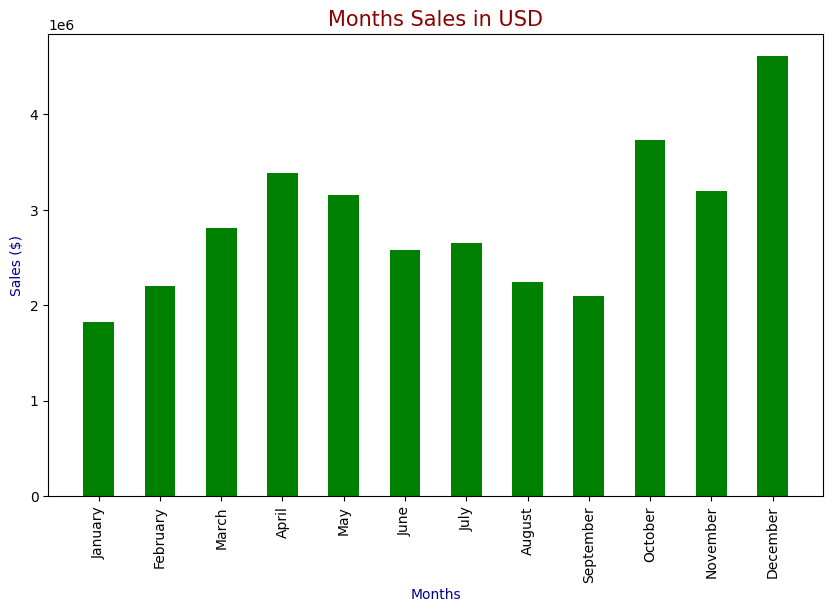

In [301]:
# using plot
plt.style.use('default')
plt.figure(figsize=(10, 6))

plt.bar(months, months_sales.total_sales, width=.5, color='green')

plt.xticks(months, rotation='vertical')
plt.xlabel("Months", color='darkblue', size=10)
plt.ylabel("Sales ($)", color='darkblue', size=10)
plt.title("Months Sales in USD", color='darkred', size=15)

plt.savefig("C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales Data 2019/Project img/01_months_sales", bbox_inches='tight', dpi=300)
plt.show()

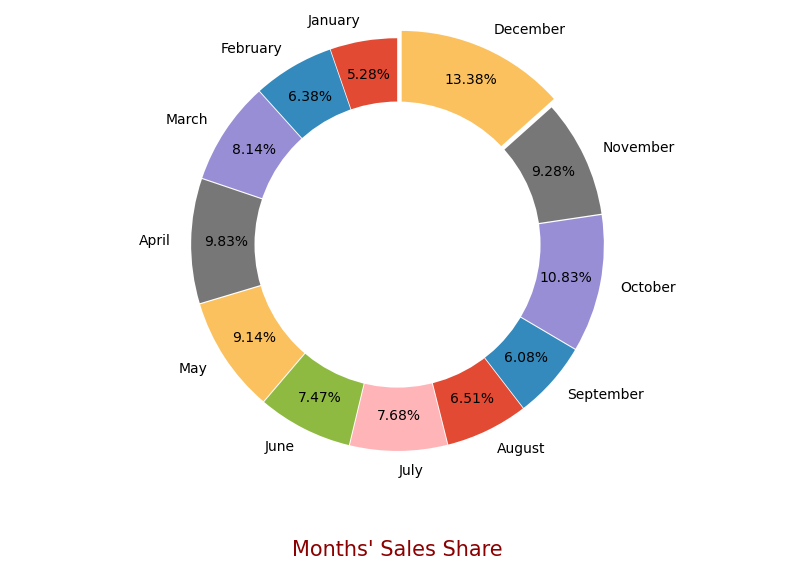

In [329]:
# Pie chart
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05)


plt.pie(months_sales.total_sales, labels=months, explode=explode, autopct='%1.2f%%', startangle=90, pctdistance=0.83)
plt.axis('equal')

plt.title("Months' Sales Share", color='darkred', size=15, y=-.2)


#draw circle
centre_circle = plt.Circle((0,0),.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig("C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales Data 2019/Project img/01_months_sales_share", bbox_inches='tight', dpi=300)
plt.show()

December was the best month for sales with 4613443.34 USD

Q2: What city sold the most product?

We can answer this question by plotting bar chart betweetn cities and total sales.

In [305]:
# Exclude non-numeric columns before performing the groupby and sum operations
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Add the 'month' column back to the numeric dataframe
numeric_df['city'] = df['city']

# Now, perform groupby on 'month' and sum the numeric columns
grouped_df = numeric_df.groupby('city').sum()

# Sort the results by 'total_sales' in descending order
sorted_df = grouped_df.sort_values('total_sales', ascending=False)

# Display the sorted DataFrame
sorted_df

,order_id,quantity_ordered,price_each,total_sales,hour
city,,,,,
"San Francisco, CA",10304443952,50239,8211461.74,8262203.91,643265
"Los Angeles, CA",6811084693,33289,5421435.23,5452570.80,427444
"New York City, NY",5736333884,27932,4635370.83,4664317.43,357696
"Boston, MA",4598265261,22528,3637409.77,3661642.01,288225
"Atlanta, GA",3423838407,16602,2779908.20,2795498.58,214264
"Dallas, TX",3415643578,16730,2752627.82,2767975.40,214390
"Seattle, WA",3406693974,16553,2733296.01,2747755.48,213292
"Portland, OR",2305594747,11303,1860558.22,1870732.34,144421
"Austin, TX",2280982185,11153,1809873.61,1819581.75,141946


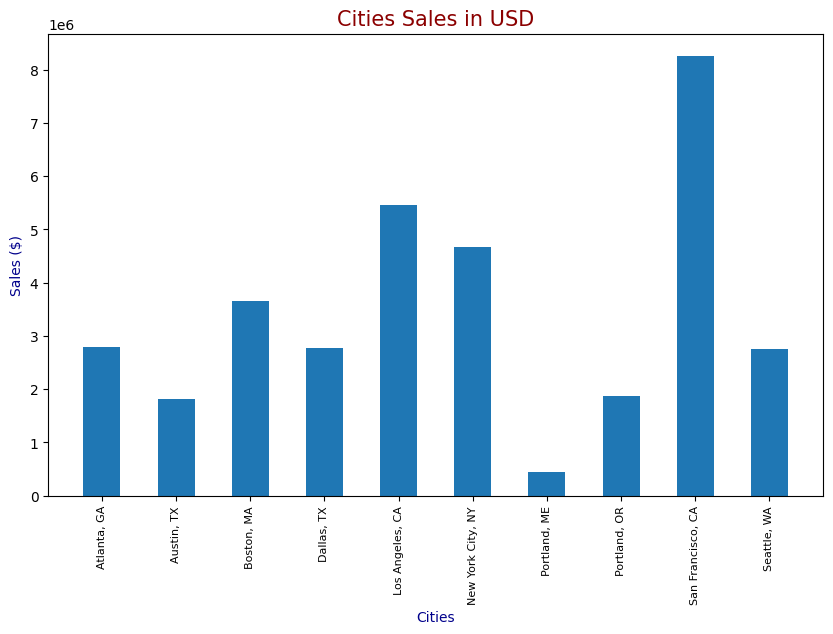

In [158]:
# using plot
city_sales = df.groupby('city').sum()
cities = [city for city, df in df.groupby('city')]

plt.figure(figsize=(10, 6))
plt.style.use('default')


plt.bar(cities, city_sales.total_sales, width=0.5)

plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel("Cities", color='darkblue', size=10)
plt.ylabel("Sales ($)", color='darkblue', size=10)
plt.title("Cities Sales in USD", color='darkred', size=15)

plt.savefig("C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales Data 2019/Project img/02_city_sales", bbox_inches='tight', dpi=300)
plt.show()

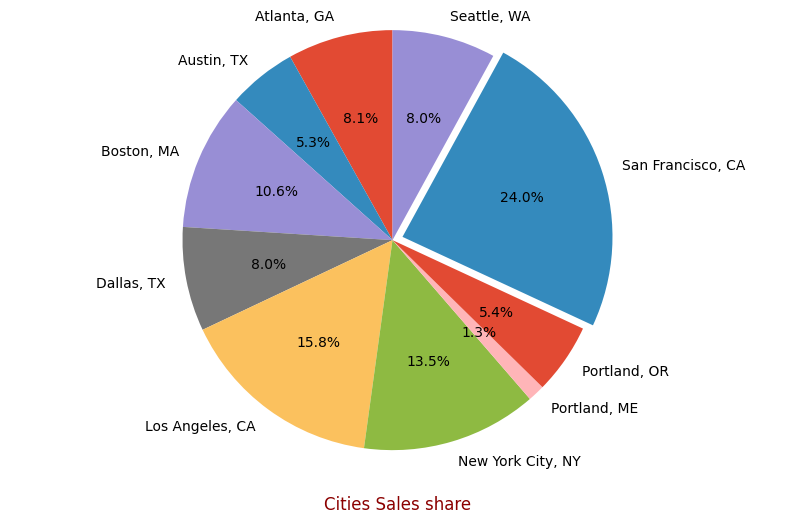

In [160]:
# Pie chart
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

explode = (0., 0, 0, 0, 0, 0, 0, 0, 0.05, 0)
plt.pie(city_sales.total_sales, labels=cities, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title("Cities Sales share", color='darkred', size=12, y=-.1)

plt.savefig("C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales Data 2019/Project img/02_city_sales_share", bbox_inches='tight', dpi=300)
plt.show()


San Francisco was the highest city in sales with 8262203.91 USD


Q3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

We can answer this question by plotting line chart betweet day's hours and total sales.

In [306]:
# Exclude non-numeric columns before performing the groupby and sum operations
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Add the 'month' column back to the numeric dataframe
numeric_df['hour'] = df['hour']

# Now, perform groupby on 'month' and sum the numeric columns
grouped_df = numeric_df.groupby('hour').sum()

# Sort the results by 'total_sales' in descending order
sorted_df = grouped_df.sort_values('total_sales', ascending=False)

# Display the sorted DataFrame
sorted_df

,order_id,quantity_ordered,price_each,total_sales
hour,,,,
19,2977594958,14470,2398588.31,2412938.54
12,2904640163,14202,2299876.68,2316821.34
11,2860187075,14005,2288855.18,2300610.24
20,2817372045,13768,2268185.16,2281716.24
18,2825964832,13802,2207696.93,2219348.30
13,2796951036,13685,2139743.86,2155389.80
17,2518339565,12229,2116777.02,2129361.61
14,2534309930,12362,2072194.77,2083672.73
21,2516707491,12244,2030763.83,2042000.86


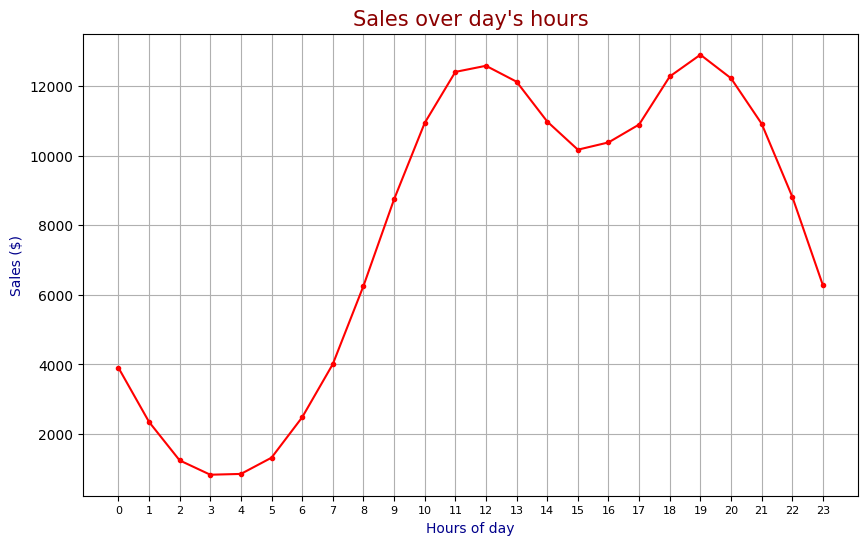

In [185]:
# using plot
hour_sales = df.groupby('hour').count()
hours = [hour for hour, df in df.groupby('hour')]

plt.figure(figsize=(10, 6))

plt.plot(hours, hour_sales.total_sales, 'r.-')

plt.xticks(hours, size=8)
plt.xlabel("Hours of day", color='darkblue', size=10)
plt.ylabel("Sales ($)", color='darkblue', size=10)
plt.title("Sales over day's hours", color='darkred', size=15)
plt.grid()
plt.savefig("C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales Data 2019/Project img/03_hour_sales", bbox_inches='tight', dpi=300)
plt.show()


Looks like we have two peaks, at 12:00 PM and 7:00 PM, We should display more advertisement before these times.

Q4: What products are most often sold together?

We can check order_id. If there are matched, that means they are the same order.

In [307]:
# Check all duplicated order id
df_same_id = df[df.order_id.duplicated(keep=False)]
df_same_id.head(10)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,"Los Angeles, CA",19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,"San Francisco, CA",17
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,600.00,"San Francisco, CA",17
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,14.95,"New York City, NY",11
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,11.95,"New York City, NY",11


In [308]:
# combine all products of the same order_id to one column
df_same_id['all_products'] = df_same_id.groupby('order_id')['product'].transform(lambda x: ', '.join(x))

df_same_id.head()

C:\Users\Kiran\AppData\Local\Temp\ipykernel_115268\3812814686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_id['all_products'] = df_same_id.groupby('order_id')['product'].transform(lambda x: ', '.join(x))


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour,all_products
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14,"Google Phone, Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",19,"Google Phone, USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,"Los Angeles, CA",19,"Google Phone, USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11,"Bose SoundSport Headphones, Bose SoundSport He..."


In [309]:

# Drop duplicated order id
df_same_id.drop_duplicates('order_id', inplace=True)
# use only needed columns
df_same_id = df_same_id[['order_id', 'all_products']]
df_same_id.head()

C:\Users\Kiran\AppData\Local\Temp\ipykernel_115268\2732063254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_id.drop_duplicates('order_id', inplace=True)


,order_id,all_products
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


Find out which 2 product are sold together, then we may make offers on them to increase sales.

In [310]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_same_id.all_products:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
                 
for key, value in count.most_common(5):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


Q5: What product sold the most? Why do you think it sold the most?

In [319]:
# Group by 'product', sum the 'quantity_ordered' column, and sort the result in descending order
sorted_quantities = df.groupby('product')['quantity_ordered'].sum().sort_values(ascending=False)

# Display the result
sorted_quantities


product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: quantity_ordered, dtype: int64

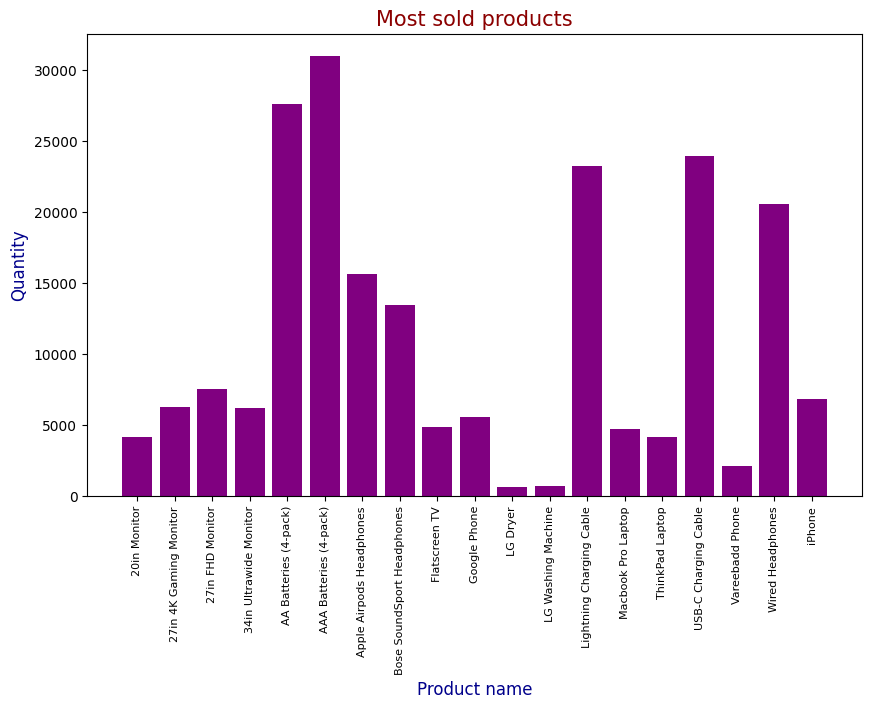

In [190]:
plt.figure(figsize=(10, 6))

product_group = df.groupby('product')
products = [product for product, df in product_group]

plt.bar(products, product_group.sum()['quantity_ordered'], color='purple')

plt.xticks(products, rotation='vertical', size=8)
plt.xlabel("Product name", color='darkblue', size=12)
plt.ylabel("Quantity", color='darkblue', size=12)
plt.title("Most sold products", color='darkred', size=15)

plt.savefig("C://Users/Kiran/OneDrive/Desktop/DATA ANALAYTICS/Python/Sales Data 2019/Project img/04_most_product", bbox_inches='tight', dpi=300)
plt.show()

AAA Batteries (4-pack) and AA Batteries (4-pack) sold more

In [ ]:
Conclusion
         This project aims to transform raw sales data into valuable business insights by following a systematic approach involving data exploration, cleaning, analysis, and predictive modeling. Through careful examination and processing of the dataset, we expect to uncover key factors driving sales performance and develop models that can accurately predict future trends. The insights generated will provide actionable recommendations to enhance sales strategies, optimize product offerings, and better target customers. Ultimately, the project will empower stakeholders with data-driven decision-making tools to drive business growth and profitability.
